### Importando base de dados e bibliotecas

In [45]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../Data/2004-2021.tsv', sep='\t')

### Tratamento dos dados

In [46]:
df.head()
df.info() 

'''Observações do .info()
    - colunas de Datas estão no formato 'str', mas deveriam estar no formato 'datetime'
    - as colunas abaixo estão no formato 'str', mas deveriam estar no formato 'float': 
        11 MARGEM MÉDIA REVENDA
        13 PREÇO MÉDIO DISTRIBUIÇÃO       
        14 DESVIO PADRÃO DISTRIBUIÇÃO     
        15 PREÇO MÍNIMO DISTRIBUIÇÃO       
        16 PREÇO MÁXIMO DISTRIBUIÇÃO       
        17 COEF DE VARIAÇÃO DISTRIBUIÇÃO
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

"Observações do .info()\n    - colunas de Datas estão no formato 'str', mas deveriam estar no formato 'datetime'\n    - as colunas abaixo estão no formato 'str', mas deveriam estar no formato 'float': \n        11 MARGEM MÉDIA REVENDA\n        13 PREÇO MÉDIO DISTRIBUIÇÃO       \n        14 DESVIO PADRÃO DISTRIBUIÇÃO     \n        15 PREÇO MÍNIMO DISTRIBUIÇÃO       \n        16 PREÇO MÁXIMO DISTRIBUIÇÃO       \n        17 COEF DE VARIAÇÃO DISTRIBUIÇÃO\n"

In [47]:
'''# Convertendo colunas de datas
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'])
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])


#Convertendo colunas numéricas
colunas_float = [
    'MARGEM MÉDIA REVENDA',                   # lista de colunas que precisam ser convertidas
    'PREÇO MÉDIO DISTRIBUIÇÃO',
    'DESVIO PADRÃO DISTRIBUIÇÃO',
    'PREÇO MÍNIMO DISTRIBUIÇÃO',
    'PREÇO MÁXIMO DISTRIBUIÇÃO',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO'
]

for coluna in colunas_float:
    df[coluna] = (
        df[coluna]
        .astype(str)                          # garante que tudo é string
        .str.replace(',', '.', regex=False)   # troca vírgula por ponto
        .replace(['-'], np.nan)               # substitui traços por NaN
        .astype(float)                        # converte pra float
    )
    mediana = df[coluna].median()
    df[coluna] = df[coluna].fillna(mediana)   # substituindo os missing values pela mediana (menos de 5% de missing)

# Agora substituir os -99999 por mediana da própria coluna
for coluna in colunas_float:
    mediana = df.loc[df[coluna] != -99999, coluna].median()
    df[coluna] = df[coluna].replace(-99999, mediana)'''

"# Convertendo colunas de datas\ndf['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'])\ndf['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])\n\n\n#Convertendo colunas numéricas\ncolunas_float = [\n    'MARGEM MÉDIA REVENDA',                   # lista de colunas que precisam ser convertidas\n    'PREÇO MÉDIO DISTRIBUIÇÃO',\n    'DESVIO PADRÃO DISTRIBUIÇÃO',\n    'PREÇO MÍNIMO DISTRIBUIÇÃO',\n    'PREÇO MÁXIMO DISTRIBUIÇÃO',\n    'COEF DE VARIAÇÃO DISTRIBUIÇÃO'\n]\n\nfor coluna in colunas_float:\n    df[coluna] = (\n        df[coluna]\n        .astype(str)                          # garante que tudo é string\n        .str.replace(',', '.', regex=False)   # troca vírgula por ponto\n        .replace(['-'], np.nan)               # substitui traços por NaN\n        .astype(float)                        # converte pra float\n    )\n    mediana = df[coluna].median()\n    df[coluna] = df[coluna].fillna(mediana)   # substituindo os missing values pela mediana (menos de 5% de missing)\n\n# Agora

In [48]:
# Convertendo colunas de datas
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'])
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])

# Convertendo colunas numéricas
colunas_float = [
    'MARGEM MÉDIA REVENDA',
    'PREÇO MÉDIO DISTRIBUIÇÃO',
    'DESVIO PADRÃO DISTRIBUIÇÃO',
    'PREÇO MÍNIMO DISTRIBUIÇÃO',
    'PREÇO MÁXIMO DISTRIBUIÇÃO',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO'
]

for coluna in colunas_float:
    df[coluna] = (
        df[coluna]
        .astype(str)           # garante que é string pra fazer replace
        .str.replace(',', '.', regex=False) # troca vírgula por ponto
        .replace('-', np.nan)  # trata o traço
        .astype(float)         # converte pra float
    )

    # Substituir NaN ou -99999 pela mediana válida
    mediana = df.loc[(df[coluna].notna()) & (df[coluna] != -99999), coluna].median()

    df[coluna] = df[coluna].replace(-99999, np.nan)  # marca -99999 como NaN
    df[coluna] = df[coluna].fillna(mediana)          # substitui NaN pela mediana


In [49]:
df['PRODUTO'].value_counts()

#OBS: Produtos com diferenciação devido a escrita

PRODUTO
GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: count, dtype: int64

In [50]:
# Função para remover acentos
def remover_acentos(texto):
    if isinstance(texto, str):
        return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    return texto

# Aplicando na coluna 'PRODUTO'
df['PRODUTO'] = df['PRODUTO'].apply(remover_acentos).str.upper().str.strip()

# Conferir novamente os valores únicos
print(df['PRODUTO'].value_counts())


PRODUTO
GASOLINA COMUM        23570
GLP                   23561
OLEO DIESEL           23545
ETANOL HIDRATADO      23440
GNV                   14469
OLEO DIESEL S10       11489
GASOLINA ADITIVADA      749
Name: count, dtype: int64


### Análise Exploratória

##### Distribuição dos preços de Revenda ao longo dos anos

In [53]:
#criando coluna ANO
df['ANO'] = df['DATA INICIAL'].dt.year

#Média anual dos preços de Revenda
precos_ano = df.groupby(['ANO', 'PRODUTO'])[['PREÇO MÉDIO REVENDA']].mean().reset_index()
precos_ano

precos_ano_sem_glp = precos_ano[precos_ano['PRODUTO'] != 'GLP']

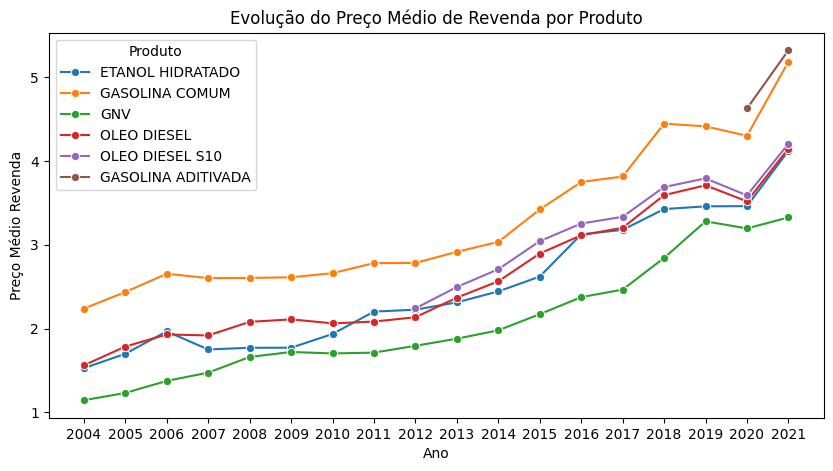

In [58]:
anos = sorted(df['ANO'].unique()) # criando variável para exibir todos os anos no eixo X

plt.figure(figsize=(10,5))
sns.lineplot(data=precos_ano_sem_glp, x='ANO', y='PREÇO MÉDIO REVENDA', hue='PRODUTO', marker='o')
plt.title('Evolução do Preço Médio de Revenda por Produto')
plt.ylabel('Preço Médio Revenda')
plt.xlabel('Ano')
plt.xticks(anos)
plt.legend(title='Produto')
plt.show()
